# Project: Investigate a Dataset - [Medical Appointment No Shows Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction
In this project I have investigated a dataset of appoinment records for Brasil public hospitals. The data includes some attributes of patients and state if the patients showed up to appointments. The analysis is focused on finding trends influencing patients to show or not show up to appointments.
<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains data about 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. This project is an investigation to explore the factors affect the the patients show up or miss the scheduled appointments.


### Question(s) for Analysis

>#### Question1 : Do age or gender affect missing the scheduled appointments? And what age categories and gender affect it?
>#### Question2 : Does not recieving SMS affect miss the scheduled appointments?
>#### Question3 : Does scholarship affect attending the scheduled appointments?
>#### Question4 : Does having health condition such as hypertension, diabetes, alcoholism and handicap affect missing the scheduled appointments?
>#### Question5 : Does neighbourhood affect missing the scheduled appointments?
>#### Question6 : Does number of waiting days before appointment affect missing the scheduled appointments? And Do specific weekdays or intervals of month affect it?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

### <a id='wrangling'></a>
# Data Wrangling

In [2]:
#loading data into notebook
df = pd.read_csv('KaggleV2-May-2016.csv', index_col = 'AppointmentID')

In [3]:
#displaying sample of dataset
df.head(20)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5626772,9.598513e+13,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
5630279,7.336882e+14,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
5630575,3.449833e+12,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5638447,5.639473e+13,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [4]:
#print unique values in 'no_show' column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
#print number of rows and columns in dataset
df.shape

(110527, 13)

In [6]:
#print datatypes in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


In [7]:
#display summary statstics of dataset
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#display how many records with age less than zero
len(df[df.Age <0])

1

In [9]:
#print number of nulls  in dataset
df.isnull().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
#print duplicates in dataset 
df.duplicated().sum()

618

In [11]:
#print unique values in columns
print(df['Scholarship'].unique())
print(df['Hipertension'].unique())
print(df['Diabetes'].unique())
print(df['Alcoholism'].unique())
print(df['Handcap'].unique())
print(df['SMS_received'].unique())
print(df['No-show'].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


>### 1. Removing Duplicates

In [12]:
df.drop_duplicates(inplace=True)

>### 2. Removung Unused  Colums

In [13]:
df.drop(columns=['PatientId'], axis=1, inplace = True)

>### 3. Renaming Colums

In [14]:
#renaming columns
df.columns = ('gender','scheduled_day','appointment_day','age','neighbourhood','scholarship','hypertension','diabetes','alcoholism','handicap','SMS_received','no_show')

In [15]:
#displaying sample of modified names of columns 
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
AppointmentID,,,,,,,,,,,,
5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>### 4. Modifying Datatypes of Columns

In [16]:
#converting type of data in scheduled_day column from object to datetime
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])

#converting type of data in appointment_day column from object to datetime
df['appointment_day']=pd.to_datetime(df['appointment_day'])

In [17]:
#check datatypes of 'scheduled_day' and 'appointment_day' columns after modifying
print(df['scheduled_day'].dtype)
print(df['appointment_day'].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]


In [18]:
#change datatype of 'scheduled_day' to datetime
df['scheduled_day'] = df['scheduled_day'].astype('datetime64[ns]')

#change datatype of 'appointment_day' to datetime
df['appointment_day'] = df['appointment_day'].astype('datetime64[ns]')

C:\Users\Shrouq\AppData\Local\Temp\ipykernel_16840\3396011915.py:2: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df['scheduled_day'] = df['scheduled_day'].astype('datetime64[ns]')
C:\Users\Shrouq\AppData\Local\Temp\ipykernel_16840\3396011915.py:5: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df['appointment_day'] = df['appointment_day'].astype('datetime64[ns]')


>### 5. Renaming Values

In [19]:
#rename values in 'gender' column
df = df.replace({'gender' : {'F': 'Female','M': 'Male'}})

In [20]:
#rename values in 'scholarship' column
df = df.replace({'scholarship' : { 0 : 'no scholarship', 1 : 'scholarship'}})

In [21]:
#rename values in 'hypertension' column
df = df.replace({'hypertension' : { 0 : 'no hypertension', 1 : 'hypertension'}})

In [22]:
#rename values in 'diabetes' column
df = df.replace({'diabetes' : { 0 : 'no diabetes', 1 : 'diabetes'}})

In [23]:
#rename values in 'alcoholism' column 
df = df.replace({'alcoholism' : { 0 : 'no alcoholism', 1 : 'alcoholism'}})

In [24]:
#rename values in 'handicap' column 
df = df.replace({'handicap' : { 0 : 'no handicap', 1 : 'handicap', 2 : 'handicap', 3 : 'handicap', 4: 'handicap'}})

In [25]:
#rename values in 'SMS_received' column 
df = df.replace({'SMS_received' : { 0 : 'no SMS recieved', 1 : 'SMS recieved'}})

In [26]:
#rename values in 'no_show' column 
df = df.replace({'no_show' : { 'No' : 'missed', 'Yes' : 'showed'}})

In [27]:
#displyaing sample of modified dataset
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
AppointmentID,,,,,,,,,,,,
5642903,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,no scholarship,hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed
5642503,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,no scholarship,no hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed
5642549,Female,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,no scholarship,no hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed
5642828,Female,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,no scholarship,no hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed
5642494,Female,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,no scholarship,hypertension,diabetes,no alcoholism,no handicap,no SMS recieved,missed


### <a id='eda'></a>
# Data Exploration

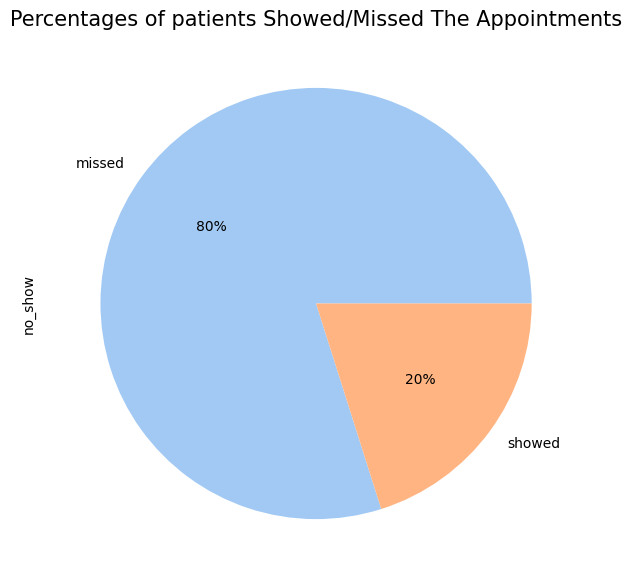

In [28]:
#displaying percentages of patients who showed in the scheduled appointments and patients who missed them
colors = sns.color_palette('pastel')[0:5]
df['no_show'].value_counts().plot.pie(colors=colors,autopct='%.0f%%', figsize=(7,7))
plt.title('Percentages of patients Showed/Missed The Appointments', fontsize=15);

This shows that according to this data, only **20%** of patients **attended** their scheduled appointments, while the other **80%** **missed** them.

## Research Question 1  (Do age or gender affect missing the scheduled appointments? And what age categories and gender affect it?)

## 1. Age Categories vs Missed Appointments

In [29]:
#create function to  seperate into categories
def age_category(age):
    if age < 4:
        return 'baby'
    elif age < 10:
        return 'child'
    elif age < 21:
        return 'teen'       
    elif age < 33:
        return 'young_adult'
    elif age < 50:
        return 'adult'
    return 'eldery'

In [30]:
#apply 'age_category' function on 'age' column
df['age_category']=df['age'].apply(age_category)

In [31]:
#display sample of dataset
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,age_category
AppointmentID,,,,,,,,,,,,,
5642903,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,no scholarship,hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed,eldery
5642503,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,no scholarship,no hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed,eldery
5642549,Female,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,no scholarship,no hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed,eldery
5642828,Female,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,no scholarship,no hypertension,no diabetes,no alcoholism,no handicap,no SMS recieved,missed,child
5642494,Female,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,no scholarship,hypertension,diabetes,no alcoholism,no handicap,no SMS recieved,missed,eldery


In [32]:
#display count of value of unique values in 'age_category' column
df['age_category'].value_counts()

eldery         36843
adult          24769
young_adult    16601
teen           14282
baby            8927
child           8487
Name: age_category, dtype: int64

In [33]:
df_missed = df[df['no_show'] == 'missed']

Text(0, 0.5, 'Count of Missed Appointments')

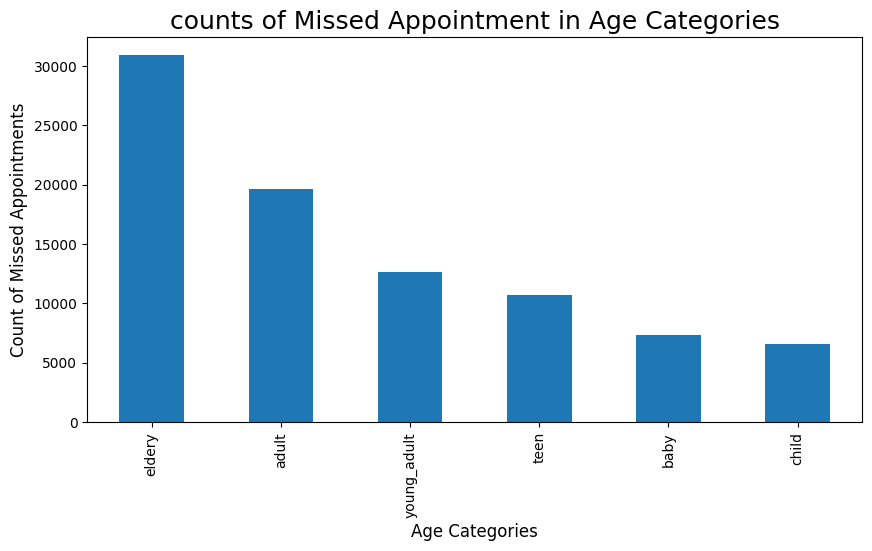

In [34]:
#show graph of the counts of missed appoinments of 'age_category' unique values
colors = sns.color_palette('pastel')[0:5]
df_missed['age_category'].value_counts().plot.bar(figsize=(10,5))
plt.title('counts of Missed Appointment in Age Categories', fontsize=18);
plt.xlabel('Age Categories',fontsize=12)
plt.ylabel('Count of Missed Appointments',fontsize=12)

This shows that the **eldery** are most likely to miss scheduled appointments, while **babies and children** are most likely to attend them.

## 2. Age vs Show/Miss Appointments

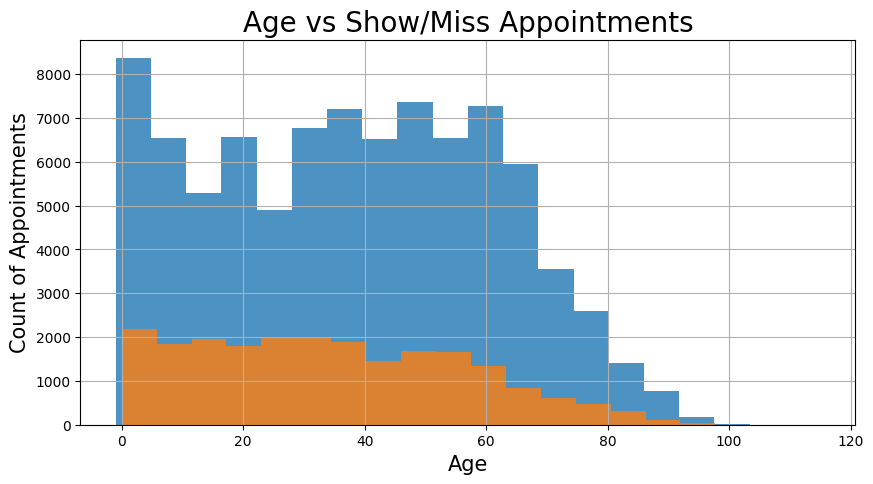

In [35]:
#filtering dataset according to 'no_show' column
df_showed = df[df['no_show'] == 'showed']
df_missed = df[df['no_show'] == 'missed']

#displyaing proportions of count of patients who attend and miss the appointments to get more accurate results
df_missed['age'].hist(alpha=.8,bins=20,figsize=(10,5))
df_showed['age'].hist(alpha=.8,bins=20,figsize=(10,5))
plt.title('Age vs Show/Miss Appointments', fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count of Appointments',fontsize=15);


This shows that ages **0-10** and **35-65** have the **highest frequency** of scheduled appointments, while ages **70-100** have the **lowest frequency**. But the **proportion** of patients who miss scheduled appointments is almost **the same** at **all ages**, which means age is not a significant factor in missing scheduled appointments.

## 3. Gender vs Show/Miss Appointments

In [36]:
#display unique values
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
#calculates
for item in df['gender'].unique():
    df_sms = df[df['gender']==item]
    df_showed_recieved_sms = df_sms[df_sms['no_show']=='showed']
    percentage_showed = (df_showed_recieved_sms.shape[0]/df_sms.shape[0])*100
    print('Count of patients with',item,'is',df_sms.shape[0],',','%.2f'%percentage_showed,'%','of them showed up.')

Count of patients with Female is 71424 , 20.24 % of them showed up.
Count of patients with Male is 38485 , 19.87 % of them showed up.


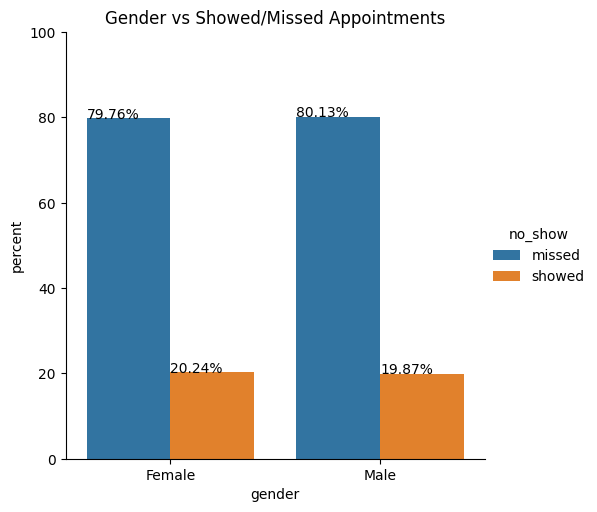

In [38]:
#show graph of the percentages of missed/showed appoinments of unique values in 'gender' column
x,y = 'gender', 'no_show'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(title='Gender vs Showed/Missed Appointments')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This explains that there are **71,424** scheduled appointments for **females**, of which only **20.24%** showed up, while there are **38,485** scheduled appointments for males, of which only **19.87%** showed up. This indicates that the number of females who make an appointment is much higher than the number of males, but the **percentage** of patients who **show up** is about the **same** for both genders, hence genedr doesn't affect missing the scheduled appointments significantly. 

## Research Question 2   (Does not recieving SMS affect missing the scheduled appointments?)

In [39]:
#display unique values
df['SMS_received'].unique()

array(['no SMS recieved', 'SMS recieved'], dtype=object)

In [40]:
#calculates
for item in df['SMS_received'].unique():
    df_sms = df[df['SMS_received']==item]
    df_showed_recieved_sms = df_sms[df_sms['no_show']=='showed']
    percentage_showed = (df_showed_recieved_sms.shape[0]/df_sms.shape[0])*100
    print('Count of patients with',item,'is',df_sms.shape[0],',','%.2f'%percentage_showed,'%','of them showed up.')

Count of patients with no SMS recieved is 74427 , 16.55 % of them showed up.
Count of patients with SMS recieved is 35482 , 27.57 % of them showed up.


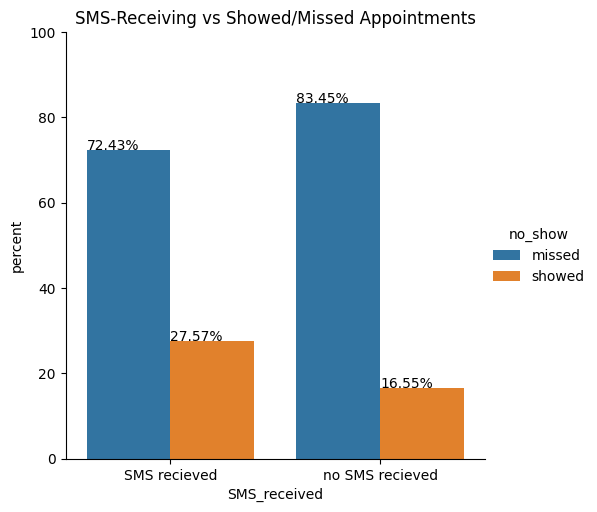

In [41]:
#show graph of the percentages of missed/showed appoinments of unique values in 'SMS_received' column
x,y = 'SMS_received', 'no_show'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(title='SMS-Receiving vs Showed/Missed Appointments')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This clearly shows that **74,427** patients **didn't** receive SMS, only **16.55%** of them showed up in the scheduled appointments, and **35,482** patients **received** SMS, **27.57%** of them showed up in the scheduled appointments. Therefore, the **percentage** of patients showing up after receiving SMS is almost **twice** the percentage of patients showing up and didn't receive SMS.

## Research Question 3 (Does scholarship affect attending scheduled appointments?)

In [42]:
#display unique values
df['scholarship'].unique()

array(['no scholarship', 'scholarship'], dtype=object)

In [43]:
#calculates
for item in df['scholarship'].unique():
    df_sms = df[df['scholarship']==item]
    df_showed_recieved_sms = df_sms[df_sms['no_show']=='showed']
    percentage_showed = (df_showed_recieved_sms.shape[0]/df_sms.shape[0])*100
    print('Count of patients with',item,'is',df_sms.shape[0],',','%.2f'%percentage_showed,'%','of them showed up.')

Count of patients with no scholarship is 99107 , 19.72 % of them showed up.
Count of patients with scholarship is 10802 , 23.67 % of them showed up.


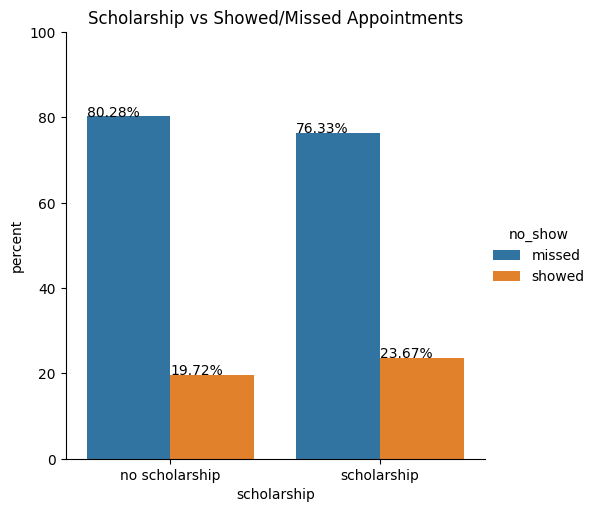

In [44]:
#show graph of the percentages of missed/showed appoinments of unique values in 'scholarship' column
x,y = 'scholarship', 'no_show'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(title='Scholarship vs Showed/Missed Appointments')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This clearly shows that **99,107** patients with **no scholarship**, **19.72%** of them showed up in the scheduled appointments, and **10,802** patients with **scholarship**, only **23.67%** of them showed up in the scheduled appointments, hence having scholarship doesn't affect missing the scheduled appointments significantly.

## Research Question 4 (Does having health condition such as hypertension, diabetes, alcoholism and handicap affect missing the scheduled appointments?)

## 1. Health Conditions vs Show/Miss Appointments

In [45]:
#display unique values
print(df['hypertension'].unique())
print(df['diabetes'].unique())
print(df['alcoholism'].unique())
print(df['handicap'].unique())

['hypertension' 'no hypertension']
['no diabetes' 'diabetes']
['no alcoholism' 'alcoholism']
['no handicap' 'handicap']


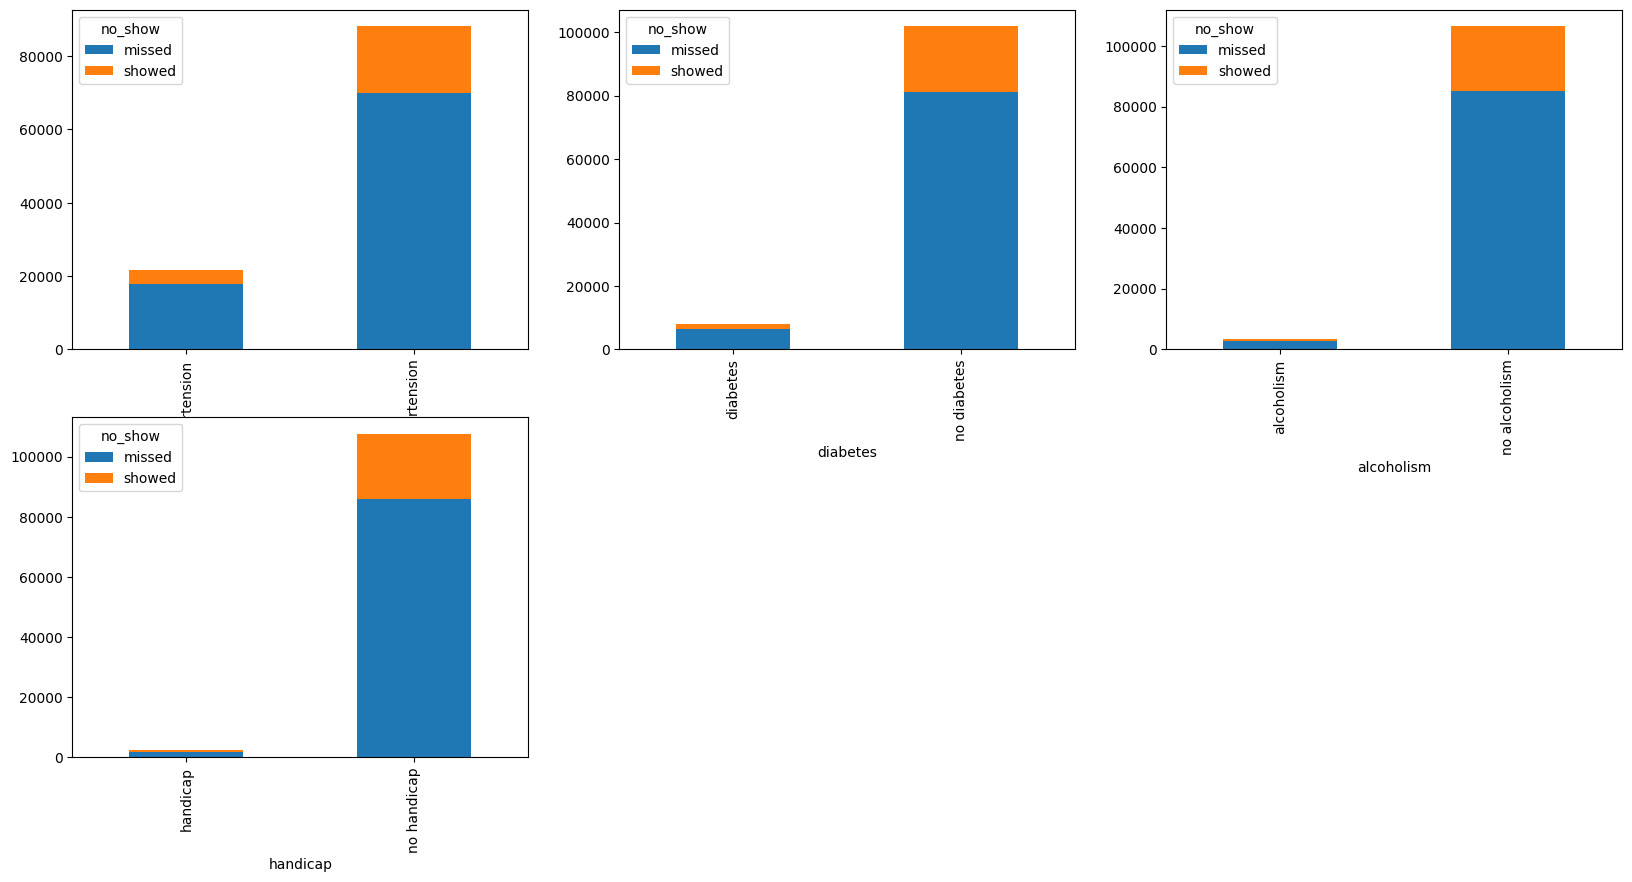

In [46]:
#create list of health conditions columns in datasaet
health_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

#show graph of counts of patients attend and miss appointments in different health conditions
fig = plt.figure(figsize=(20, 15))
for i, item in enumerate(health_conditions):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([item, 'no_show'])[item].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)   

This shows that patients with some health conditions such as alcoholism, diabetes, and handicap represent a small proportion of patients in our dataset, while patients with hypertension are more frequent.

## 2. Hypertension vs Show/Miss Appointments

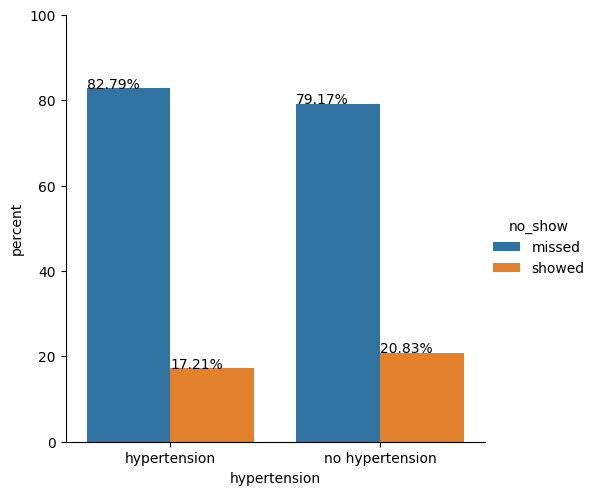

In [47]:
#show graph of the percentages of missed/showed appoinments of unique values in 'hypertension' column
x,y = 'hypertension', 'no_show'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This shows that **hypertension** patients who miss their scheduled appointments represent **17.3%** of hypertension patients, while patients with **no hypertension** who miss their scheduled appointments represent **20.9%** of general patients with no hypertension, 2 chances are approximately the **same** for each category, therefore hypertension would not have an effect on missing the scheduled appointments significantly. 

## Research Question 5 (Does neighbourhood affect showing up to the scheduled appointments?)

## 1. Neighbourhoods vs Show/Miss Appointments

In [48]:
#print unique values
df['neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

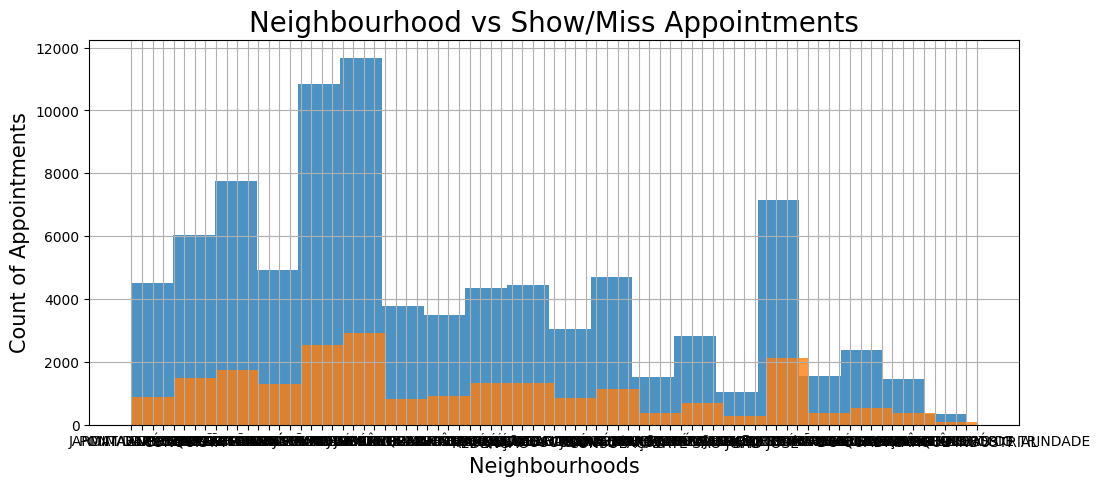

In [49]:
#show histograms of counts of patients attend and miss appointments of different neighbourhoods
df_missed['neighbourhood'].hist(alpha=.8,bins=20,figsize=(12,5))
df_showed['neighbourhood'].hist(alpha=.8,bins=20,figsize=(12,5))
plt.title('Neighbourhood vs Show/Miss Appointments', fontsize=20)
plt.xlabel('Neighbourhoods',fontsize=15)
plt.ylabel('Count of Appointments',fontsize=15);

This indicates that proportion of patients who attended the sceduled appointments in most of the **neighborhoods** is nearly **the same**.

## 2. 5 Most Frequent Neighbourhoods vs Show/Miss Appointments

In [50]:
#displyaing the 5 most frequent neghbourhoods to have more accurate exploratoion results
df['neighbourhood'].value_counts().sort_values(ascending=False)[:5]

JARDIM CAMBURI     7621
MARIA ORTIZ        5804
RESISTÊNCIA        4387
JARDIM DA PENHA    3873
ITARARÉ            3470
Name: neighbourhood, dtype: int64

In [51]:
#create copy of dataframe
df_copy_2 = df.copy

#filtering 'neighbourhood' column of the dataframe copy based on the 5 most frequent neghbourhoods
df_copy_2 = df[(df.neighbourhood=='JARDIM CAMBURI')|(df.neighbourhood=='MARIA ORTIZ')|(df.neighbourhood=='RESISTÊNCIA')|(df.neighbourhood=='JARDIM DA PENHA')|(df.neighbourhood=='ITARARÉ')]

In [52]:
#print unique values in the filtered 'neighbourhood' column
df_copy_2['neighbourhood'].unique()

array(['JARDIM DA PENHA', 'JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA',
       'ITARARÉ'], dtype=object)

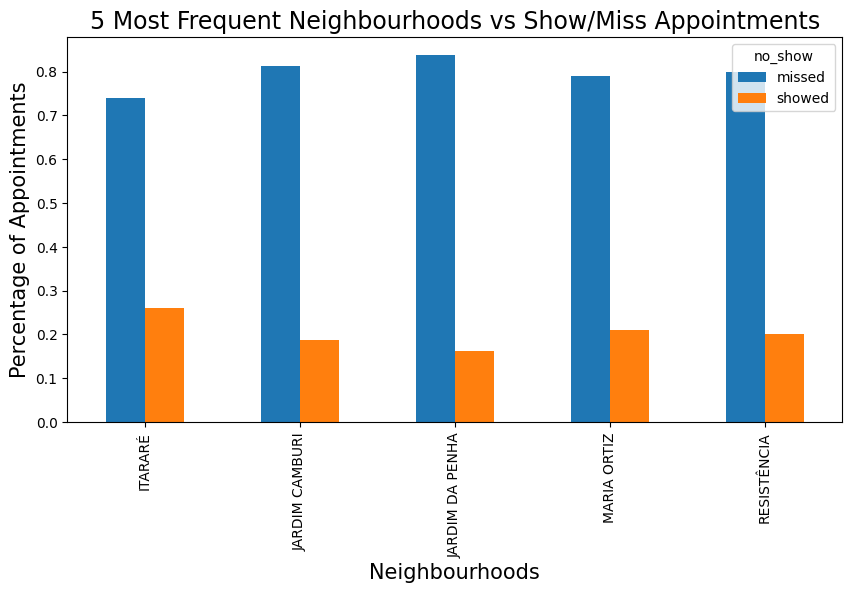

In [53]:
#show graph of the percentages of missed/showed appoinments in the 5 most frequent neibourhoods to have more accutrate exploration results
df_copy_2.groupby('neighbourhood')['no_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
plt.title('5 Most Frequent Neighbourhoods vs Show/Miss Appointments', fontsize=17)
plt.xlabel('Neighbourhoods',fontsize=15)
plt.ylabel('Percentage of Appointments',fontsize=15);
plt.show()

This indicates that **ITARARÉ** has the **highest** percentage of patients who showed up, and **JARDIM DA PENHA** has the **lowest** percentage, however, the percentages are nearly **the same** for all 5 neighbourhoods, hence neighbourhood **doesn't affect missing the scheduled appointments** significantly.

## Research Question 6 ( Does number of waiting days before appointment affect missing the scheduled appointments? And Do specific weekdays or intervals of month affect it?)

## 1. waiting Days vs Show/Miss Appointments

In [54]:
#create 'appointment_interval' column contains number of waiting days before  appointments 
df['appointment_interval'] = (df['appointment_day'] - df['scheduled_day']).dt.days

In [55]:
#display summary statistics of 'appointment_interval' column
df['appointment_interval'].describe()

count    109909.000000
mean          9.156320
std          15.250811
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: appointment_interval, dtype: float64

In [56]:
#create copy of dataframe
df_copy3 = df.copy

#filter 'appointment_interval' column 
df_copy3=df[(df['appointment_interval']>=0) & (df['appointment_interval']<=14)]

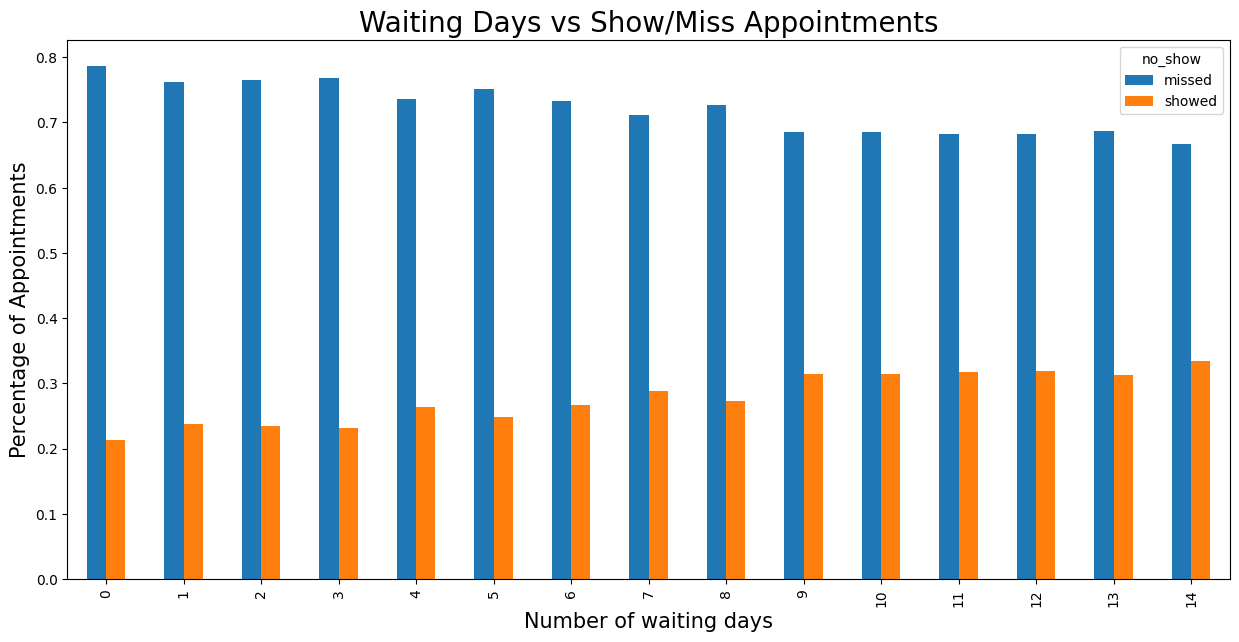

In [57]:
#show graph of the percentages of missed/showed appoinments according to number of waiting days before appointment
df_copy3.groupby('appointment_interval')['no_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,7))
plt.title('Waiting Days vs Show/Miss Appointments', fontsize=20)
plt.xlabel('Number of waiting days',fontsize=15)
plt.ylabel('Percentage of Appointments',fontsize=15);
plt.show()

This indicates that the percentage of patients shows up less than **10%** when the appointment is schedualed on the **same day**, while it is **20-30%** when waiting **1-9 days** before Appointment is day, but percentage  **increases** slightly in **10-14 days** wait and **exceeds 30%**.

## 2. Weekdays vs Showed/Missed Appointments

In [58]:
#extract weekdays names numbers from 'appointment_day' column
df['appointment_weekday'] = pd.to_datetime(df['appointment_day']).dt.day_name()

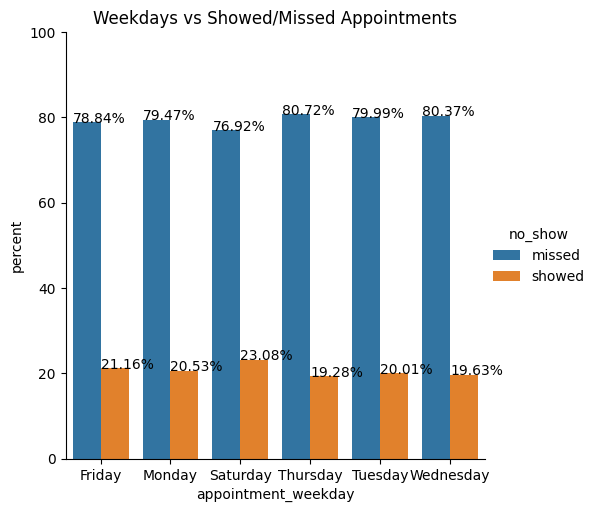

In [59]:
#show graph of the percentages of missed/showed appoinments in all weekdays
x,y = 'appointment_weekday', 'no_show'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(title='Weekdays vs Showed/Missed Appointments')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This clearly shows that the proportion of patients who show up for scheduled appointments is nearly **the same** every day of the week, in addition there is **no data for Sunday** appointments, hence weekdays do not affect missed appointments.

## 3. Month intervals vs Showed/Missed Appointments

In [60]:
#extract days numbers from 'appointment_day' column
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.day

In [61]:
#create bins of month periods
bins= [0,10,20,31]
labels = ['Beginning of Month','Middle of Month','End of Month']
df['month_periods'] = pd.cut(df['appointment_day'], bins=bins, labels=labels, right=False)

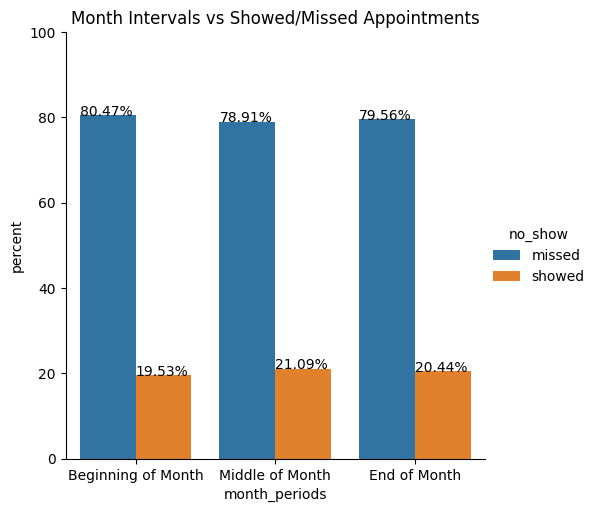

In [62]:
#show graph of the percentages of missed/showed appoinments in different month periods
x,y = 'month_periods', 'no_show'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(title='Month Intervals vs Showed/Missed Appointments')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This indicates that the proportion of patients who show up for scheduled appointments is almost **the same** all month periods, so it has no effect on missing appointments.

### <a id='conclusions'></a>
## Conclusions

### Findings from the datasets analysis : 
1. Ages **0-10** and **35-65** have the **highest frequency** of scheduled appointments, while ages **70-100** have the **lowest frequency**. But the **proportion** of patients who miss scheduled appointments is almost **the same** at **all ages**, so **age is not an important factor in missing scheduled appointments**. Also, the number of females who schedule an appointment is much higher than the number of males, but only **20.24%** of females and **19.87%** of males showed up, hence **genedr doesn't affect missing the scheduled appointments**. 
2. **16.55%** of patients who **didn't** receive SMS attended the appointments, while **27.57%** of patients who **received SMS** showed up, which is 11.02% higher, as a result **recieving SMS has an influence on attending scheduled appointments**.
3. The percentage of patients with **no scholarship** who attended the appointments is **19.72%** and only **23.67%** for patients with **scholarship**, as a result **having scholarship doesn't affect missing the scheduled appointments significantly**.
4. Patients with some health conditions such as **hypertension, diabetes, handicap, and alcoholism** represent a small proportion of patients in dataset, and the percentage of **hypertension** patients who miss the appointments is **17.3%** and  **20.9%** for patients with **no hypertension**, as a result **health conditons don't play important role in missing the appoinments**.
5. Of the 5 most frequent neighbourhoods in dataset **ITARARÉ** has the highest percentage of patients who showed up , and **JARDIM DA PENHA** has the lowest percentage, although, the **proportions in different neighbourhoods are nearly the same**, hence **neighbourhood doesn't affect missing the scheduled appointments significantly**.
6. The Percentage of patients show up less than **10%** when the appointment is scheduled on the **same day**, while it is **20-30%** when waiting is **1-9 days** , but the percentage  **increases** slightly in **10-14 days** wait and **exceeds 30%**. And, the proportion of patients who show up for scheduled appointments is nearly **the same** every **day of the week** except Sunday, and also **the same** in different **month intervals**, as a result, **specific weekdays and month intervals have no influence on missing appointments, while waiting days before appointments is an important factor**.

### Limitations
Attributes of the dataset are not sufficient to optimize the exploration and findings of dataset analysis, as stated earlier waiting days before scheduled appointments significantly affect missing the appointments, and there is a possibilty that there are different vital associated elements which may include distance to hospital, in addition, time of  'AppointmentDay' attribute should be inserted besides date to investigate the influence of different intervals through the day.